In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Levenshtein

In [13]:
# Load the files
bert_5_2k = pd.read_csv('poc_bertscore_down_0.05_2000_precFlipOnly.csv')
bert_5_2k_failed = pd.read_csv('poc_bertscore_down_0.05_2000_precFlipOnly_failed.csv')

bleu_5_2k = pd.read_csv('poc_bleu4_down_0.05_2000_precFlipOnly.csv')
bleu_5_2k_failed = pd.read_csv('poc_bleu4_down_0.05_2000_precFlipOnly_failed.csv')

bleurt_5_1k = pd.read_csv('poc_bleurt_down_0.05_1000_precFlipOnly.csv')
bleurt_5_1k_failed = pd.read_csv('poc_bleurt_down_0.05_1000_precFlipOnly_failed.csv')
bleurt_15_1k = pd.read_csv('poc_bleurt_down_0.15_1000_precFlipOnly.csv')
bleurt_15_1k_failed = pd.read_csv('poc_bleurt_down_0.15_1000_precFlipOnly_failed.csv')

meteor_down_5_2k = pd.read_csv('poc_meteor_down_0.05_2000_precFlipOnly.csv')
meteor_down_5_2k_failed = pd.read_csv('poc_meteor_down_0.05_2000_precFlipOnly_failed.csv')

meteor_down_15_2k = pd.read_csv('poc_meteor_down_0.15_2000_precFlipOnly.csv')
meteor_down_15_2k_failed = pd.read_csv('poc_meteor_down_0.15_2000_precFlipOnly_failed.csv')

dfs = [bert_5_2k, bleu_5_2k, bleurt_5_1k, bleurt_15_1k, meteor_down_5_2k, meteor_down_15_2k]
failed_dfs = [bert_5_2k_failed, bleu_5_2k_failed, bleurt_5_1k_failed, bleurt_15_1k_failed, meteor_down_5_2k_failed, meteor_down_15_2k_failed]
experiment_names = ['bert_5_2k', 'bleu_5_2k', 'bleurt_5_1k', 'bleurt_15_1k', 'meteor_down_5_2k', 'meteor_down_15_2k']


In [14]:
# %Failed
for idx, name in enumerate(experiment_names):
    print(name)
    print(f'#Success: {len(dfs[idx])}, #Failed {len(failed_dfs[idx])}, {len(dfs[idx]) / (len(dfs[idx]) + len(failed_dfs[idx]))}')

bert_5_2k
#Success: 1992, #Failed 8, 0.996
bleu_5_2k
#Success: 1501, #Failed 499, 0.7505
bleurt_5_1k
#Success: 1000, #Failed 0, 1.0
bleurt_15_1k
#Success: 1000, #Failed 0, 1.0
meteor_down_5_2k
#Success: 1989, #Failed 11, 0.9945
meteor_down_15_2k
#Success: 1967, #Failed 33, 0.9835


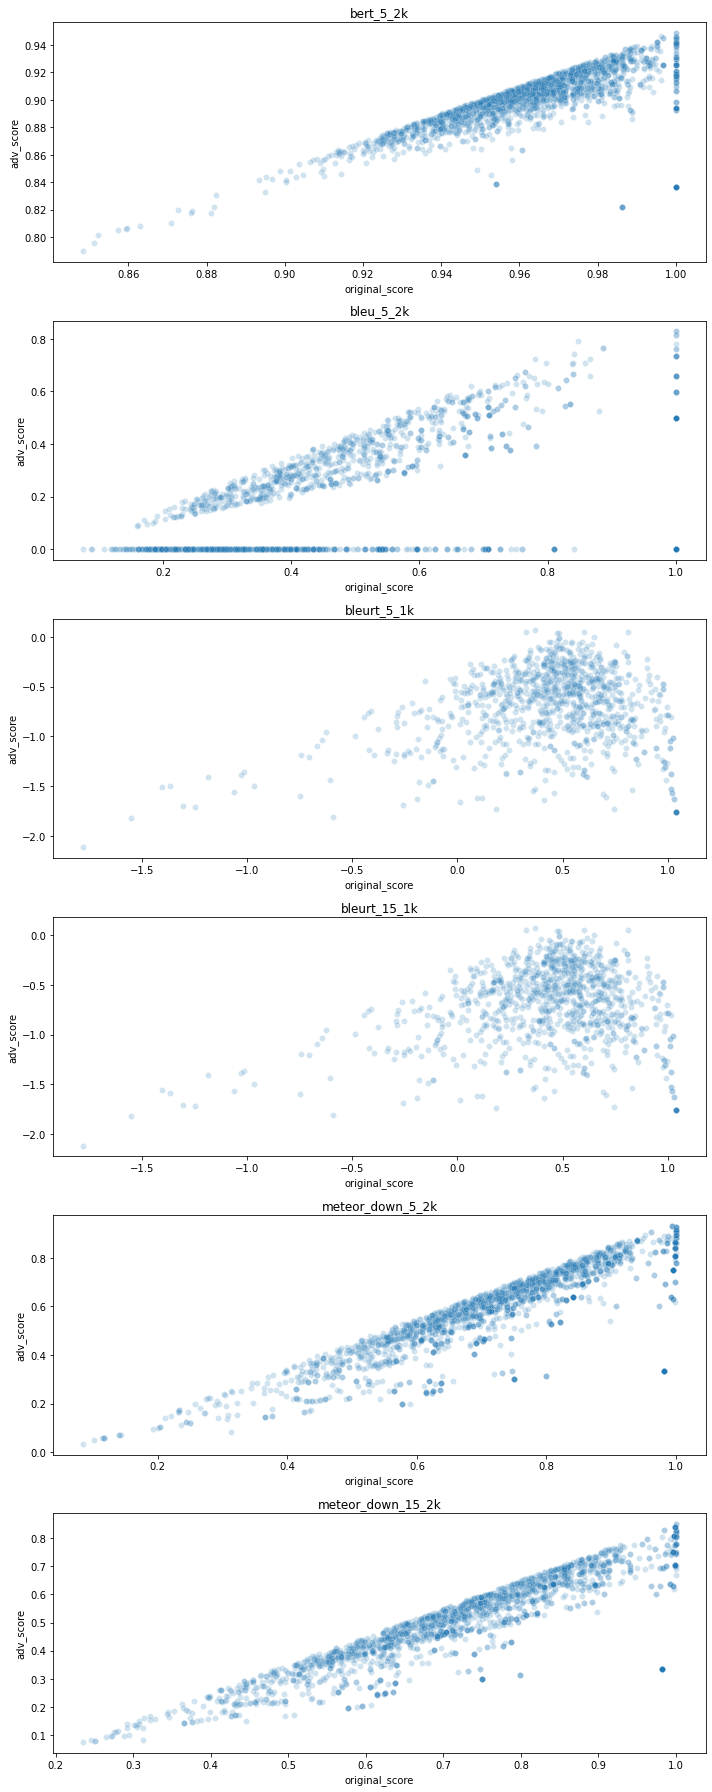

In [64]:
# Score distribution (before, after)
fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 25), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    sns.scatterplot(ax = axs[idx], x = dfs[idx]['original_score'], y = dfs[idx]['adv_score'], alpha = 0.2)

fig.tight_layout()
plt.show()

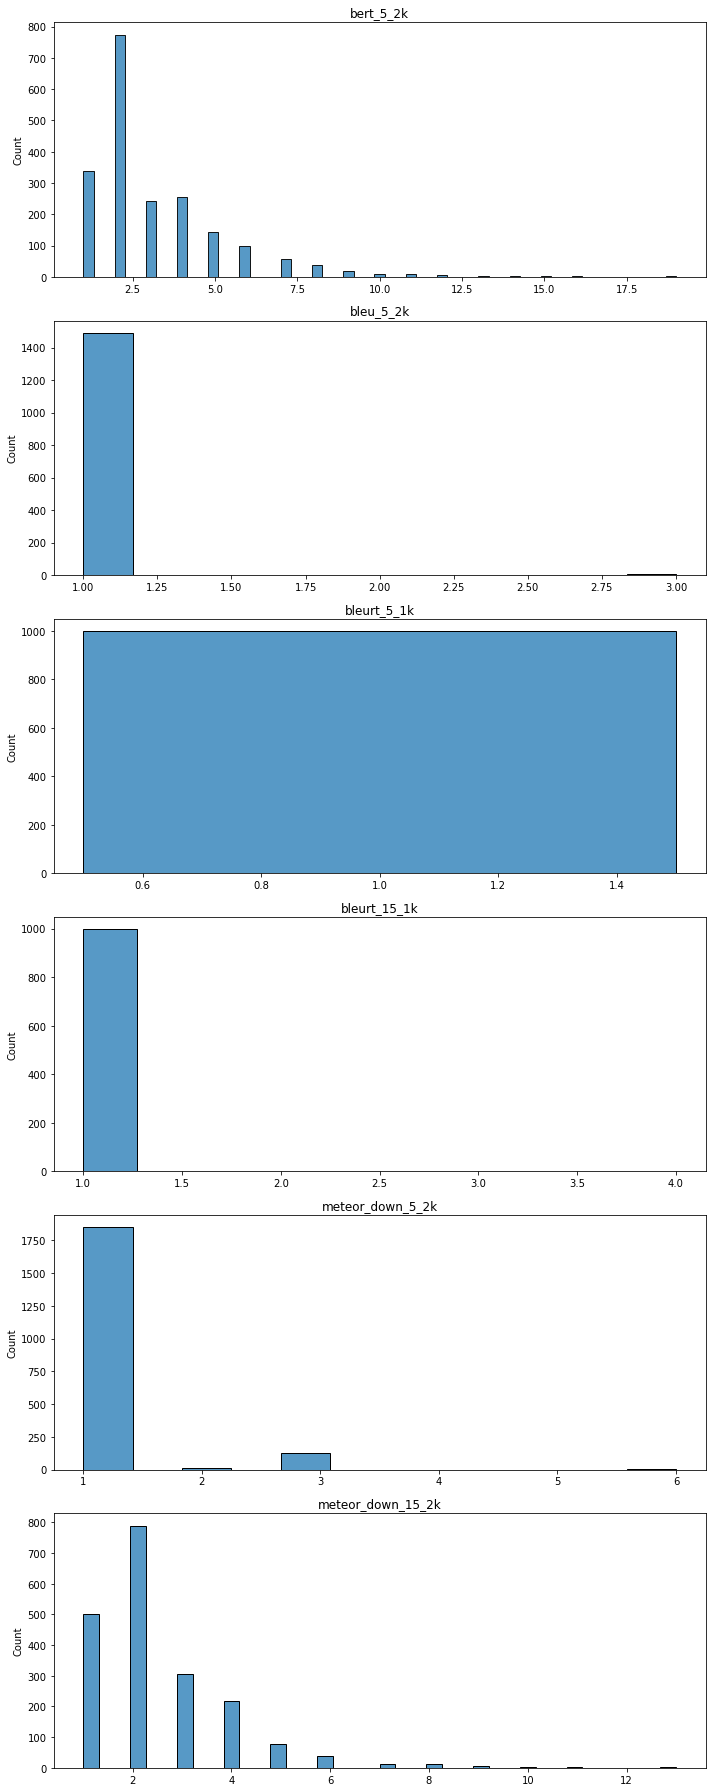

In [67]:
# Edit distance
def get_edit_dist(df):
    out = []
    for line_idx in range(len(df)):
        mt = df['mt'][line_idx]
        adv = df['adv'][line_idx]
        dist = Levenshtein.distance(mt.split(' '), adv.split(' '))
        out.append(dist)
    return out

fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 25), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    dist = get_edit_dist(dfs[idx])
    sns.histplot(dist, ax = axs[idx])

fig.tight_layout()
plt.show()